<a href="https://colab.research.google.com/github/eedcolson/myrepo_sense_training/blob/master/Greenland_SST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Earth Engine Python API - SENSE Week 1 Training, Project 2**

## Import API and get credentials
This notebook will attempt to create a timeseries summary of sea surface temperature for an area in Greenland


In [1]:
# Import earthengine API
import ee
# Authenticate and initialise (American spelling required)
ee.Authenticate()
ee.Initialize()


To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=1ypp_FGRvnDSZ1lnMYFa5GXK2Lb8Sjv82lBQPOg8CJ4&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/5QHVpFl18wQAlvoPgyKi_FDE5k0Rw6iEP51mT-70h9KqaobpqH3Ci3A

Successfully saved authorization token.


## Iterating over an ImageCollection

Using the ImageCollection function to load the NOAA Sea Surface Temperature Collection



In [ ]:
# Loading the NOAA Sea Surface Temperature Collection

collection = ee.ImageCollection("NOAA/CDR/OISST/V2_1").select('sst')

# Working with 2013 onwards, sorting chronologically in descending order (false flag)
reference = collection.filterDate('2013-01-01', '2020-10-01').sort('system:time_start', False)

# Computing mean of the dataset
mean = reference.mean()

# Displaying
import folium
#!pip install geehydro
import geehydro

# Display mean of the dataset
sstMap = folium.Map(location=[40.2, -100.811],zoom_start=5) 
sstMap.addLayer(mean, {'min': -60000, 'max': 60000, 'palette': ['FF0000', '000000', '00FF00']}, 'SST Mean')
folium.LayerControl().add_to(sstMap)
sstMap

In [14]:
%matplotlib inline
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams


# Define point in the Amazon rainforest
point = ee.Geometry.Point(-42,62)

# Finding info from the selected point

info = reference.getRegion(point,500).getInfo()
print(info)

header = info[0]
data = array(info[1:])

iTime = header.index('time')
time =  [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

band_list = ['sst']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

SST = yData[:,0]*0.0001 #CHECK NOAA SCALE FACTOR
print(SST)

df = pd.DataFrame(data=SST, columns=['sst'])

df['Date'] = pd.Series(time, index=df.index)

[['id', 'longitude', 'latitude', 'time', 'sst'], ['20200930', -41.99848532079793, 61.99947512171908, 1601424000000, 110], ['20200929', -41.99848532079793, 61.99947512171908, 1601337600000, 132], ['20200928', -41.99848532079793, 61.99947512171908, 1601251200000, 131], ['20200927', -41.99848532079793, 61.99947512171908, 1601164800000, 144], ['20200926', -41.99848532079793, 61.99947512171908, 1601078400000, 178], ['20200925', -41.99848532079793, 61.99947512171908, 1600992000000, 220], ['20200924', -41.99848532079793, 61.99947512171908, 1600905600000, 230], ['20200923', -41.99848532079793, 61.99947512171908, 1600819200000, 220], ['20200922', -41.99848532079793, 61.99947512171908, 1600732800000, 221], ['20200921', -41.99848532079793, 61.99947512171908, 1600646400000, 221], ['20200920', -41.99848532079793, 61.99947512171908, 1600560000000, 225], ['20200919', -41.99848532079793, 61.99947512171908, 1600473600000, 210], ['20200918', -41.99848532079793, 61.99947512171908, 1600387200000, 181], ['

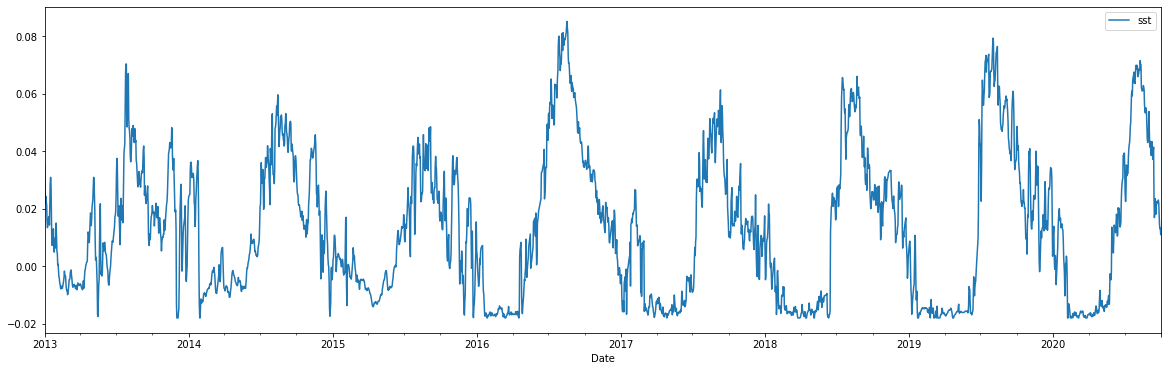

In [15]:
# Plotting

rcParams['figure.figsize'] = 20, 6
df.plot(y='sst',x='Date')
plt.show()